In [11]:
import time

In [5]:
from helper import (load_data, token, DanishCleaner,
                    show_diagram, show_most_informative_features)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight') # plt.style.available

In [ ]:
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split


In [4]:
from sklearn.pipeline import make_pipeline, FeatureUnion, Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.linear_model import LogisticRegression

In [6]:
stops = joblib.load('../stops.pkl')

Loading data ...
Droping 10 rows with features lenght of less than 2
Droping 3 as rating and setting 1-2 as negative(0), 4-5 as positive(1))
{1: 460527, 0: 127232} 

Down sampling positive ratings to match negatives
Data loading completed
{1: 127232, 0: 127232} 



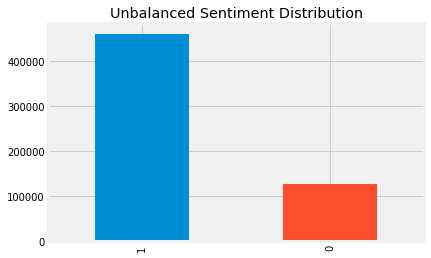

In [7]:
df = load_data('../sentiment_data')

In [ ]:
df.head()

In [8]:
#Splict data into 90 training and 10 testing
X_train, X_test, y_train, y_test = train_test_split(df.features, df.y,
                                                    test_size=0.1, random_state= 7,stratify=df.target)

In [9]:
count_para = dict(ngram_range=(1, 3),tokenizer=token,
                     lowercase=True,stop_words=stops,min_df=10, max_df=.8)

lda_para = dict(n_components=2, max_iter=10, learning_method='online', verbose=1,
                learning_offset=50.,doc_topic_prior=.1, topic_word_prior=.01,random_state=7) #max=50

logit_para = dict(C=1., penalty='l2', random_state=0,verbose=1, solver='saga', n_jobs=-1)  #n_jobs=-1 does not have any effect when solver is liblinear l2

In [10]:
model = Pipeline ([
    ('text_union', FeatureUnion([
                        ('lda_pipe', Pipeline([
                            ('countvec', CountVectorizer(**count_para)),
                            ('lda',LatentDirichletAllocation(**lda_para))
                                            ])),
                        ('tfidf', TfidfVectorizer(strip_accents='unicode', min_df=10, ngram_range=(1, 2)))
                                ])
    ),
    ('clf', LogisticRegression(**logit_para, max_iter=200))
    
])

In [1]:
s = time.time()
model.fit(X_train, y_train)
v = time.time()

NameError: name 'time' is not defined

In [13]:
(v-s)/60

19.35926520029704

Classification Report
	 _____________________________________________
             precision    recall  f1-score   support

   Negative       0.94      0.96      0.95     12723
   Positive       0.96      0.94      0.95     12724

avg / total       0.95      0.95      0.95     25447

	 _____________________________________________ 




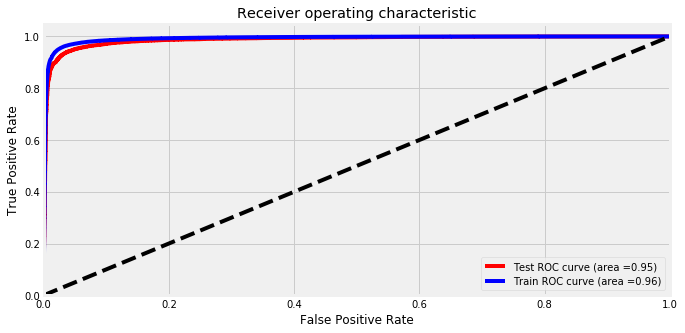

In [14]:
show_diagram(model,X_train, y_train, X_test, y_test, compare_test=True)

dir(model.steps[0][1])

dir(model.steps[0][1].transformer_list[0][1].steps[0][1])

model.steps[0][1].transformer_list[0][1].steps[0][1].get_feature_names()

feature_names = model.steps[0][1].transformer_list[0][1].steps[0][1].get_feature_names()
clf = model.steps[1][1]

show_most_informative_features(clf=clf,feature_names=feature_names, n=100)